In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tidy3d as td
import tidy3d.web as web
from tidy3d.plugins.mode import ModeSolver

# Simulation Setup
Simulation of a microring resonator demultiplexer / filter. 
Consists of a ring resonator in the center, a bottom waveguide containing a mode source and the through port, and a top waveguide containing the drop port.

In [2]:
# ring resonator device parameters
wg_height = 0.220 # height of the waveguide (um)
wg_width = 0.420 # width of the waveguide (um)
start_radius = 2.0833
end_radius = 1.999
channels = 16
radius = np.linspace(start_radius, end_radius, channels)
print(radius)
gap = 0.140 # gap between the ring resonator and the straight waveguides (um)
gap2 = 0.520 # gap between rings

[2.0833  2.07768 2.07206 2.06644 2.06082 2.0552  2.04958 2.04396 2.03834
 2.03272 2.0271  2.02148 2.01586 2.01024 2.00462 1.999  ]


Run Time = 1.5485713119574208e-10


<Axes: title={'center': 'cross section at z=0.00'}, xlabel='x', ylabel='y'>

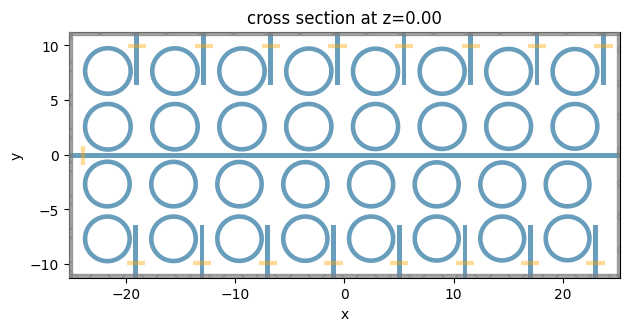

In [3]:
# permittivity of the waveguide and substrate at 1550nm
si_eps = 12.085
sio2_eps = 2.0852

# wavelength (in um) and frequency (in Hz)
lambda_range = (1.525, 1.57) # corresponding to the C-band (1.53 to 1.565)
lambda0 = np.sum(lambda_range)/2
freq_range = (td.C_0 / lambda_range[1], td.C_0 / lambda_range[0])
freq0 = td.C_0 / lambda0
freqw = freq_range[1] - freq_range[0]

# frequencies and wavelengths of monitor
Nfreq = 2000
monitor_lambdas = np.linspace(lambda_range[0], lambda_range[1], Nfreq)
monitor_freqs = np.linspace(freq_range[0], freq_range[1], Nfreq)

# spacing between the waveguide and the PML
spacing = 1.0 #um

# simulation domain and total run time
sim_size = (9*spacing + 16*wg_width + 8*gap + 2*(radius[0]+radius[1]+radius[2]+radius[3]+radius[4]+radius[5]+radius[6]+radius[7]), 2*spacing + 5*wg_width + 4*radius[0] + 4*radius[8] + 2*gap2 + 2*gap, wg_height + 2*spacing)
run_time = 30000/freq0
print("Run Time =", run_time)

# grid specification
grid_spec = td.GridSpec.auto(min_steps_per_wvl = 17, wavelength = lambda0)

# waveguide, substrate, and air material
mat_wg = td.Medium(
    permittivity = si_eps,
    name = "silicon",
)
mat_substrate = td.Medium(
    permittivity = sio2_eps,
    name = "silica",
)

# ring resonator 1
ring1_center = -sim_size[0]/2 + spacing + wg_width/2 + radius[0]

ring1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring1_center, sim_size[1]/2 - spacing - radius[0] - wg_width/2, 0],
        radius = radius[0] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 1",
)
ring1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring1_center, sim_size[1]/2 - spacing - radius[0] - wg_width/2, 0],
        radius = radius[0] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 1",
)

# ring resonator 1_1

ring1_1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring1_center, sim_size[1]/2 - spacing - 3*radius[0] - 1.5*wg_width - gap2, 0],
        radius = radius[0] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 1_1",
)
ring1_1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring1_center, sim_size[1]/2 - spacing - 3*radius[0] - 1.5*wg_width - gap2, 0],
        radius = radius[0] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 1_1",
)

# ring resonator 2
ring2_center = ring1_center + radius[0] + 2*wg_width + gap + spacing + radius[1]

ring2_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring2_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[1]) - radius[1] - wg_width/2, 0],
        radius = radius[1] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 2",
)
ring2_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring2_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[1]) - radius[1] - wg_width/2, 0],
        radius = radius[1] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 2",
)

# ring resonator 2_1

ring2_1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring2_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[1]) - 3*radius[1] - 1.5*wg_width - gap2, 0],
        radius = radius[1] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 2_1",
)
ring2_1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring2_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[1]) - 3*radius[1] - 1.5*wg_width - gap2, 0],
        radius = radius[1] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 2_1",
)

# ring resonator 3
ring3_center = ring2_center + radius[1] + 2*wg_width + gap + spacing + radius[2]

ring3_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring3_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[2]) - radius[2] - wg_width/2, 0],
        radius = radius[2] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 3",
)
ring3_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring3_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[2]) - radius[2] - wg_width/2, 0],
        radius = radius[2] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 3",
)

# ring resonator 3_1

ring3_1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring3_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[2]) - 3*radius[2] - 1.5*wg_width - gap2, 0],
        radius = radius[2] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 3_1",
)
ring3_1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring3_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[2]) - 3*radius[2] - 1.5*wg_width - gap2, 0],
        radius = radius[2] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 3_1",
)

# ring resonator 4
ring4_center = ring3_center + radius[2] + 2*wg_width + gap + spacing + radius[3]

ring4_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring4_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[3]) - radius[3] - wg_width/2, 0],
        radius = radius[3] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 4",
)
ring4_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring4_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[3]) - radius[3] - wg_width/2, 0],
        radius = radius[3] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 4",
)

# ring resonator 4_1

ring4_1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring4_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[3]) - 3*radius[3] - 1.5*wg_width - gap2, 0],
        radius = radius[3] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 4_1",
)
ring4_1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring4_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[3]) - 3*radius[3] - 1.5*wg_width - gap2, 0],
        radius = radius[3] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 4_1",
)

# ring resonator 5
ring5_center = ring4_center + radius[3] + 2*wg_width + gap + spacing + radius[4]

ring5_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring5_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[4]) - radius[4] - wg_width/2, 0],
        radius = radius[4] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 5",
)
ring5_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring5_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[4]) - radius[4] - wg_width/2, 0],
        radius = radius[4] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 5",
)

# ring resonator 5_1

ring5_1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring5_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[4]) - 3*radius[4] - 1.5*wg_width - gap2, 0],
        radius = radius[4] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 5_1",
)
ring5_1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring5_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[4]) - 3*radius[4] - 1.5*wg_width - gap2, 0],
        radius = radius[4] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 5_1",
)

# ring resonator 6
ring6_center = ring5_center + radius[4] + 2*wg_width + gap + spacing + radius[5]

ring6_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring6_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[5]) - radius[5] - wg_width/2, 0],
        radius = radius[5] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 6",
)
ring6_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring6_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[5]) - radius[5] - wg_width/2, 0],
        radius = radius[5] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 6",
)

# ring resonator 6_1

ring6_1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring6_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[5]) - 3*radius[5] - 1.5*wg_width - gap2, 0],
        radius = radius[5] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 6_1",
)
ring6_1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring6_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[5]) - 3*radius[5] - 1.5*wg_width - gap2, 0],
        radius = radius[5] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 6_1",
)

# ring resonator 7
ring7_center = ring6_center + radius[5] + 2*wg_width + gap + spacing + radius[6]

ring7_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring7_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[6]) - radius[6] - wg_width/2, 0],
        radius = radius[6] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 7",
)
ring7_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring7_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[6]) - radius[6] - wg_width/2, 0],
        radius = radius[6] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 7",
)

# ring resonator 7_1

ring7_1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring7_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[6]) - 3*radius[6] - 1.5*wg_width - gap2, 0],
        radius = radius[6] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 7_1",
)
ring7_1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring7_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[6]) - 3*radius[6] - 1.5*wg_width - gap2, 0],
        radius = radius[6] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 7_1",
)

# ring resonator 8
ring8_center = ring7_center + radius[6] + 2*wg_width + gap + spacing + radius[7]

ring8_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring8_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[7]) - radius[7] - wg_width/2, 0],
        radius = radius[7] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 8",
)
ring8_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring8_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[7]) - radius[7] - wg_width/2, 0],
        radius = radius[7] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 8",
)

# ring resonator 8_1

ring8_1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring8_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[7]) - 3*radius[7] - 1.5*wg_width - gap2, 0],
        radius = radius[7] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 8_1",
)
ring8_1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring8_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[7]) - 3*radius[7] - 1.5*wg_width - gap2, 0],
        radius = radius[7] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 8_1",
)

# ring resonator 9
ring9_center = -sim_size[0]/2 + spacing + wg_width/2 + radius[8]

ring9_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring9_center, -sim_size[1]/2 + spacing + radius[8] + wg_width/2, 0],
        radius = radius[8] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 9",
)
ring9_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring9_center, -sim_size[1]/2 + spacing + radius[8] + wg_width/2, 0],
        radius = radius[8] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 9",
)

# ring resonator 9_1

ring9_1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring9_center, -sim_size[1]/2 + spacing + 3*radius[8] + 1.5*wg_width + gap2, 0],
        radius = radius[8] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 9_1",
)
ring9_1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring9_center, -sim_size[1]/2 + spacing + 3*radius[8] + 1.5*wg_width + gap2, 0],
        radius = radius[8] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 9_1",
)

# ring resonator 10
ring10_center = ring9_center + radius[8] + 2*wg_width + gap + spacing + radius[9]

ring10_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring10_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[9]) + radius[9] + wg_width/2, 0],
        radius = radius[9] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 10",
)
ring10_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring10_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[9]) + radius[9] + wg_width/2, 0],
        radius = radius[9] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 10",
)

# ring resonator 10_1

ring10_1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring10_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[9]) + 3*radius[9] + 1.5*wg_width + gap2, 0],
        radius = radius[9] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 10_1",
)
ring10_1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring10_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[9]) + 3*radius[9] + 1.5*wg_width + gap2, 0],
        radius = radius[9] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 10_1",
)

# ring resonator 11
ring11_center = ring10_center + radius[9] + 2*wg_width + gap + spacing + radius[10]

ring11_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring11_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[10]) + radius[10] + wg_width/2, 0],
        radius = radius[10] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 11",
)
ring11_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring11_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[10]) + radius[10] + wg_width/2, 0],
        radius = radius[10] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 11",
)

# ring resonator 11_1

ring11_1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring11_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[10]) + 3*radius[10] + 1.5*wg_width + gap2, 0],
        radius = radius[10] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 11_1",
)
ring11_1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring11_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[10]) + 3*radius[10] + 1.5*wg_width + gap2, 0],
        radius = radius[10] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 11_1",
)

# ring resonator 12
ring12_center = ring11_center + radius[10] + 2*wg_width + gap + spacing + radius[11]

ring12_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring12_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[11]) + radius[11] + wg_width/2, 0],
        radius = radius[11] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 12",
)
ring12_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring12_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[11]) + radius[11] + wg_width/2, 0],
        radius = radius[11] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 12",
)

# ring resonator 12_1

ring12_1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring12_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[11]) + 3*radius[11] + 1.5*wg_width + gap2, 0],
        radius = radius[11] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 12_1",
)
ring12_1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring12_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[11]) + 3*radius[11] + 1.5*wg_width + gap2, 0],
        radius = radius[11] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 12_1",
)

# ring resonator 13
ring13_center = ring12_center + radius[11] + 2*wg_width + gap + spacing + radius[12]

ring13_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring13_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[12]) + radius[12] + wg_width/2, 0],
        radius = radius[12] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 13",
)
ring13_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring13_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[12]) + radius[12] + wg_width/2, 0],
        radius = radius[12] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 13",
)

# ring resonator 13_1

ring13_1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring13_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[12]) + 3*radius[12] + 1.5*wg_width + gap2, 0],
        radius = radius[12] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 13_1",
)
ring13_1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring13_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[12]) + 3*radius[12] + 1.5*wg_width + gap2, 0],
        radius = radius[12] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 13_1",
)

# ring resonator 14
ring14_center = ring13_center + radius[12] + 2*wg_width + gap + spacing + radius[13]

ring14_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring14_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[13]) + radius[13] + wg_width/2, 0],
        radius = radius[13] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 14",
)
ring14_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring14_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[13]) + radius[13] + wg_width/2, 0],
        radius = radius[13] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 14",
)

# ring resonator 14_1

ring14_1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring14_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[13]) + 3*radius[13] + 1.5*wg_width + gap2, 0],
        radius = radius[13] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 14_1",
)
ring14_1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring14_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[13]) + 3*radius[13] + 1.5*wg_width + gap2, 0],
        radius = radius[13] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 14_1",
)

# ring resonator 15
ring15_center = ring14_center + radius[13] + 2*wg_width + gap + spacing + radius[14]

ring15_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring15_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[14]) + radius[14] + wg_width/2, 0],
        radius = radius[14] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 15",
)
ring15_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring15_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[14]) + radius[14] + wg_width/2, 0],
        radius = radius[14] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 15",
)

# ring resonator 15_1

ring15_1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring15_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[14]) + 3*radius[14] + 1.5*wg_width + gap2, 0],
        radius = radius[14] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 15_1",
)
ring15_1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring15_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[14]) + 3*radius[14] + 1.5*wg_width + gap2, 0],
        radius = radius[14] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 15_1",
)

# ring resonator 16
ring16_center = ring15_center + radius[14] + 2*wg_width + gap + spacing + radius[15]

ring16_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring16_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[15]) + radius[15] + wg_width/2, 0],
        radius = radius[15] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 16",
)
ring16_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring16_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[15]) + radius[15] + wg_width/2, 0],
        radius = radius[15] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 16",
)

# ring resonator 16_1

ring16_1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring16_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[15]) + 3*radius[15] + 1.5*wg_width + gap2, 0],
        radius = radius[15] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 16_1",
)
ring16_1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring16_center, -sim_size[1]/2 + spacing + 2*(radius[8] - radius[15]) + 3*radius[15] + 1.5*wg_width + gap2, 0],
        radius = radius[15] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 16_1",
)


# input and output waveguides

waveguide_input = td.Structure(
    geometry = td.Box(
        center = [0, sim_size[1]/2 - spacing - 2.5*wg_width - 4*radius[0] - gap - gap2, 0],
        size = [td.inf, wg_width, wg_height],
    ),
    medium = mat_wg,
    name = "Input Waveguide"
)

waveguide_output1 = td.Structure(
    geometry = td.Box(
        center = [ring1_center + radius[0] + wg_width + gap, sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[0], wg_height],
    ),
    medium = mat_wg,
    name = "Output 1 Waveguide"
)

waveguide_output2 = td.Structure(
    geometry = td.Box(
        center = [ring2_center + radius[1] + wg_width + gap, sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[0], wg_height],
    ),
    medium = mat_wg,
    name = "Output 2 Waveguide"
)

waveguide_output3 = td.Structure(
    geometry = td.Box(
        center = [ring3_center + radius[2] + wg_width + gap, sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[0], wg_height],
    ),
    medium = mat_wg,
    name = "Output 3 Waveguide"
)

waveguide_output4 = td.Structure(
    geometry = td.Box(
        center = [ring4_center + radius[3] + wg_width + gap, sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[0], wg_height],
    ),
    medium = mat_wg,
    name = "Output 4 Waveguide"
)

waveguide_output5 = td.Structure(
    geometry = td.Box(
        center = [ring5_center + radius[4] + wg_width + gap, sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[0], wg_height],
    ),
    medium = mat_wg,
    name = "Output 5 Waveguide"
)

waveguide_output6 = td.Structure(
    geometry = td.Box(
        center = [ring6_center + radius[5] + wg_width + gap, sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[0], wg_height],
    ),
    medium = mat_wg,
    name = "Output 6 Waveguide"
)

waveguide_output7 = td.Structure(
    geometry = td.Box(
        center = [ring7_center + radius[6] + wg_width + gap, sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[0], wg_height],
    ),
    medium = mat_wg,
    name = "Output 7 Waveguide"
)

waveguide_output8 = td.Structure(
    geometry = td.Box(
        center = [ring8_center + radius[7] + wg_width + gap, sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[0], wg_height],
    ),
    medium = mat_wg,
    name = "Output 8 Waveguide"
)

waveguide_output9 = td.Structure(
    geometry = td.Box(
        center = [ring9_center + radius[8] + wg_width + gap, -sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[8], wg_height],
    ),
    medium = mat_wg,
    name = "Output 9 Waveguide"
)

waveguide_output10 = td.Structure(
    geometry = td.Box(
        center = [ring10_center + radius[9] + wg_width + gap, -sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[8], wg_height],
    ),
    medium = mat_wg,
    name = "Output 10 Waveguide"
)

waveguide_output11 = td.Structure(
    geometry = td.Box(
        center = [ring11_center + radius[10] + wg_width + gap, -sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[8], wg_height],
    ),
    medium = mat_wg,
    name = "Output 11 Waveguide"
)

waveguide_output12 = td.Structure(
    geometry = td.Box(
        center = [ring12_center + radius[11] + wg_width + gap, -sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[8], wg_height],
    ),
    medium = mat_wg,
    name = "Output 12 Waveguide"
)

waveguide_output13 = td.Structure(
    geometry = td.Box(
        center = [ring13_center + radius[12] + wg_width + gap, -sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[8], wg_height],
    ),
    medium = mat_wg,
    name = "Output 13 Waveguide"
)

waveguide_output14 = td.Structure(
    geometry = td.Box(
        center = [ring14_center + radius[13] + wg_width + gap, -sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[8], wg_height],
    ),
    medium = mat_wg,
    name = "Output 14 Waveguide"
)

waveguide_output15 = td.Structure(
    geometry = td.Box(
        center = [ring15_center + radius[14] + wg_width + gap, -sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[8], wg_height],
    ),
    medium = mat_wg,
    name = "Output 15 Waveguide"
)

waveguide_output16 = td.Structure(
    geometry = td.Box(
        center = [ring16_center + radius[15] + wg_width + gap, -sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[8], wg_height],
    ),
    medium = mat_wg,
    name = "Output 16 Waveguide"
)


# xy-plane frequency-domain field monitor at central frequency
field_mnt = td.FieldMonitor(
    center = [0,0,0],
    size = [np.inf, np.inf, 0],
    freqs = [td.C_0/1.531996, td.C_0/1.563551, td.C_0/1.554483, td.C_0/1.545419, td.C_0/1.536251, td.C_0/1.569382, td.C_0/1.559992, td.C_0/1.550464, td.C_0/1.540903, td.C_0/1.531165, td.C_0/1.566001, td.C_0/1.556046, td.C_0/1.535882, td.C_0/1.525615, td.C_0/1.562227],
    name = "Field",
)

# through port flux monitor
flux_mnt_through = td.FluxMonitor(
    center = [-sim_size[0]/2 + spacing, sim_size[1]/2 - spacing - 2.5*wg_width - 4*radius[0] - gap - gap2, 0],
    size = [0, 4 * wg_width, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Through Port)"
)

# drop port flux monitors

flux_mnt_drop1 = td.FluxMonitor(
    center = [ring1_center + radius[0] + wg_width + gap, sim_size[1]/2 - spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 1)",
    normal_dir = "+"
)

flux_mnt_drop2 = td.FluxMonitor(
    center = [ring2_center + radius[1] + wg_width + gap, sim_size[1]/2 - spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 2)",
    normal_dir = "+"
)

flux_mnt_drop3 = td.FluxMonitor(
    center = [ring3_center + radius[2] + wg_width + gap, sim_size[1]/2 - spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 3)",
    normal_dir = "+"
)

flux_mnt_drop4 = td.FluxMonitor(
    center = [ring4_center + radius[3] + wg_width + gap, sim_size[1]/2 - spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 4)",
    normal_dir = "+"
)

flux_mnt_drop5 = td.FluxMonitor(
    center = [ring5_center + radius[4] + wg_width + gap, sim_size[1]/2 - spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 5)",
    normal_dir = "+"
)

flux_mnt_drop6 = td.FluxMonitor(
    center = [ring6_center + radius[5] + wg_width + gap, sim_size[1]/2 - spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 6)",
    normal_dir = "+"
)

flux_mnt_drop7 = td.FluxMonitor(
    center = [ring7_center + radius[6] + wg_width + gap, sim_size[1]/2 - spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 7)",
    normal_dir = "+"
)

flux_mnt_drop8 = td.FluxMonitor(
    center = [ring8_center + radius[7] + wg_width + gap, sim_size[1]/2 - spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 8)",
    normal_dir = "+"
)

flux_mnt_drop9 = td.FluxMonitor(
    center = [ring9_center + radius[8] + wg_width + gap, -sim_size[1]/2 + spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 9)",
    normal_dir = "-"
)

flux_mnt_drop10 = td.FluxMonitor(
    center = [ring10_center + radius[9] + wg_width + gap, -sim_size[1]/2 + spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 10)",
    normal_dir = "-"
)

flux_mnt_drop11 = td.FluxMonitor(
    center = [ring11_center + radius[10] + wg_width + gap, -sim_size[1]/2 + spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 11)",
    normal_dir = "-"
)

flux_mnt_drop12 = td.FluxMonitor(
    center = [ring12_center + radius[11] + wg_width + gap, -sim_size[1]/2 + spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 12)",
    normal_dir = "-"
)

flux_mnt_drop13 = td.FluxMonitor(
    center = [ring13_center + radius[12] + wg_width + gap, -sim_size[1]/2 + spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 13)",
    normal_dir = "-"
)

flux_mnt_drop14 = td.FluxMonitor(
    center = [ring14_center + radius[13] + wg_width + gap, -sim_size[1]/2 + spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 14)",
    normal_dir = "-"
)

flux_mnt_drop15 = td.FluxMonitor(
    center = [ring15_center + radius[14] + wg_width + gap, -sim_size[1]/2 + spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 15)",
    normal_dir = "-"
)

flux_mnt_drop16 = td.FluxMonitor(
    center = [ring16_center + radius[15] + wg_width + gap, -sim_size[1]/2 + spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 16)",
    normal_dir = "-"
)


# simulation
sim = td.Simulation(
    size = sim_size,
    grid_spec = grid_spec,
    symmetry = [0, 0, 1],
    structures = [ring1_outer, ring1_inner, ring1_1_outer, ring1_1_inner, ring2_outer, ring2_inner, ring2_1_outer, ring2_1_inner, ring3_outer, ring3_inner, ring3_1_outer, ring3_1_inner, ring4_outer, ring4_inner, ring4_1_outer, ring4_1_inner, ring5_outer, ring5_inner, ring5_1_outer, ring5_1_inner, ring6_outer, ring6_inner, ring6_1_outer, ring6_1_inner, ring7_outer, ring7_inner, ring7_1_outer, ring7_1_inner, ring8_outer, ring8_inner, ring8_1_outer, ring8_1_inner, 
                  ring9_outer, ring9_inner, ring9_1_outer, ring9_1_inner, ring10_outer, ring10_inner, ring10_1_outer, ring10_1_inner, ring11_outer, ring11_inner, ring11_1_outer, ring11_1_inner, ring12_outer, ring12_inner, ring12_1_outer, ring12_1_inner, ring13_outer, ring13_inner, ring13_1_outer, ring13_1_inner, ring14_outer, ring14_inner, ring14_1_outer, ring14_1_inner, ring15_outer, ring15_inner, ring15_1_outer, ring15_1_inner, ring16_outer, ring16_inner, ring16_1_outer, ring16_1_inner, 
                  waveguide_input, waveguide_output1, waveguide_output2, waveguide_output3, waveguide_output4, waveguide_output5, waveguide_output6, waveguide_output7, waveguide_output8, 
                  waveguide_output9, waveguide_output10, waveguide_output11, waveguide_output12, waveguide_output13, waveguide_output14, waveguide_output15, waveguide_output16],
    medium = mat_substrate,
    sources = [],
    monitors = [flux_mnt_through, flux_mnt_drop1, flux_mnt_drop2, flux_mnt_drop3, flux_mnt_drop4, flux_mnt_drop5, flux_mnt_drop6, flux_mnt_drop7, flux_mnt_drop8, 
                flux_mnt_drop9, flux_mnt_drop10, flux_mnt_drop11, flux_mnt_drop12, flux_mnt_drop13, flux_mnt_drop14, flux_mnt_drop15, flux_mnt_drop16],
    run_time = run_time,
    shutoff = 1e-7,
    boundary_spec = td.BoundarySpec.all_sides(boundary = td.PML())
)

sim.plot(z = 0)

# Source Setup
Define a mode source that launches the TE0 mode into the input waveguide.

20:50:51 GMT Standard Time WARNING: Use the remote mode solver with subpixel    
                           averaging for better accuracy through                
                           'tidy3d.plugins.mode.web.run(...)'.                  

Effective index of computed modes:  [[2.38071895]]
Group index of computed modes:  [[4.24324489]]


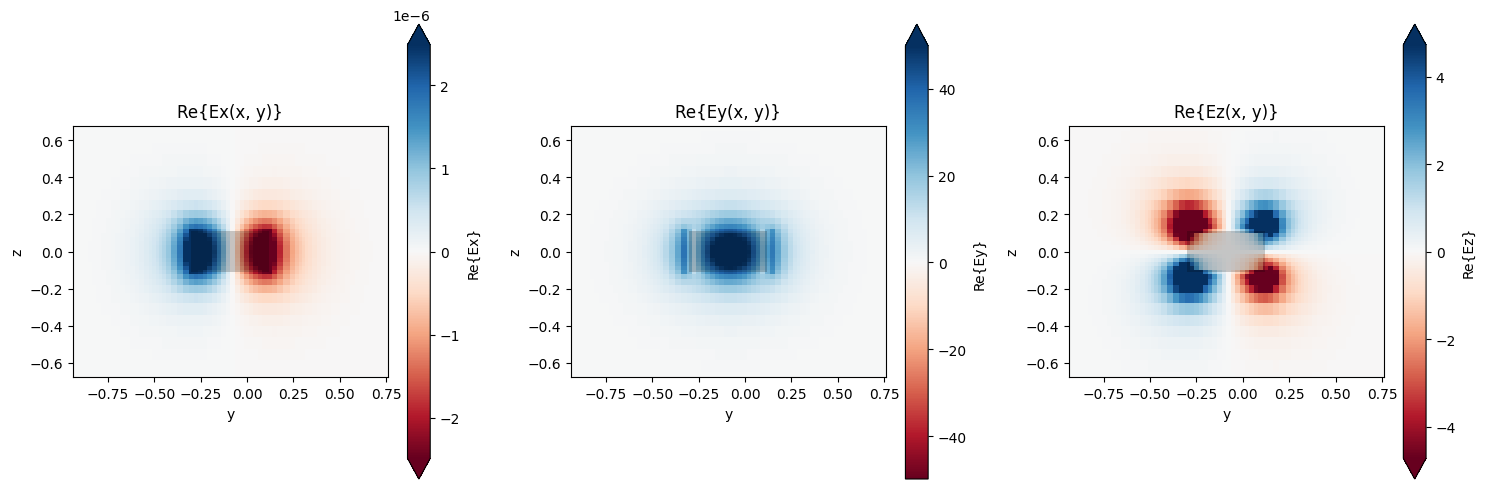

In [4]:
# position and size of source plane
source_plane = td.Box(
    center = (sim_size[0]/2 - spacing, sim_size[1]/2 - spacing - 2.5*wg_width - 4*radius[0] - gap - gap2, 0),
    size = (0,  4 * wg_width, 6 * wg_height)
)

# number of modes to solve
num_modes = 1

# setup and solve for modes
mode_spec = td.ModeSpec(num_modes = num_modes, group_index_step = True, target_neff = 3.48, filter_pol = 'te')
ms = ModeSolver(simulation = sim, plane = source_plane, mode_spec = mode_spec, freqs = [freq0])
mode_data = ms.solve()

print("Effective index of computed modes: ", np.array(mode_data.n_eff))
print("Group index of computed modes: ", np.array(mode_data.n_group))

# visualise the mode
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), tight_layout = True)
ms.plot_field("Ex", "real", f = freq0, mode_index = 0, ax = ax1)
ms.plot_field("Ey", "real", f = freq0, mode_index = 0, ax = ax2)
ms.plot_field("Ez", "real", f = freq0, mode_index = 0, ax = ax3)
ax1.set_title("Re{Ex(x, y)}")
ax2.set_title("Re{Ey(x, y)}")
ax3.set_title("Re{Ez(x, y)}")
plt.show()

# add mode source at the input of the waveguide
source_time = td.GaussianPulse(freq0 = freq0, fwidth = 0.5*freqw)
mode_source = ms.to_source(mode_index = 0, direction = "-", source_time = source_time)

sim = sim.copy(update = {"sources" : [mode_source]})

# Plot Simulation Setup

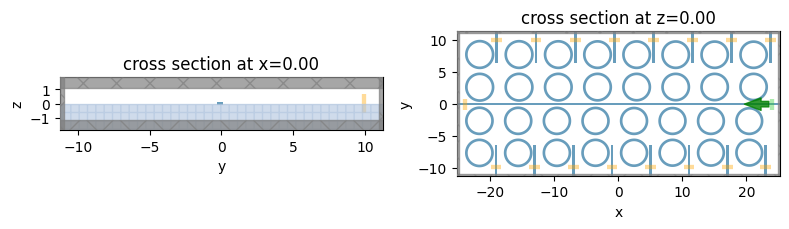

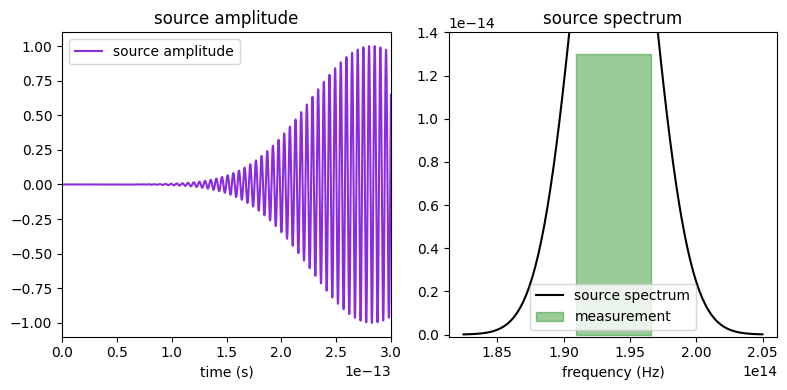

In [5]:
fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (8,4))
sim.plot(x = 0, ax = ax[0]);
sim.plot(z = 0, ax = ax[1]);
plt.show()

# Check probe and source
f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(8, 4))
plot_time = 0.3e-12
ax1 = sim.sources[0].source_time.plot(times=np.linspace(0, plot_time, 10000), ax=ax1)
ax1.set_xlim(0, plot_time)
ax1.legend(('source amplitude',))
ax2 = sim.sources[0].source_time.plot_spectrum(times=np.linspace(0, sim.run_time, 100000), val = 'abs', ax=ax2)
fill_max = 13e-15
ymax = 14e-15
ax2.fill_between(freq_range, [0,0], [fill_max, fill_max], alpha=0.4, color='g')
ax2.legend(('source spectrum', 'measurement'))
ax2.set_ylim(-1e-16, ymax)
plt.show()

sim.plot_3d()



In [6]:
# initializes job, puts task on server (but doesnt run it)
job = web.Job(simulation=sim, task_name="Second Order 16 Chanel DeMUX version 3", verbose=True)

# estimate the maximum cost
estimated_cost = web.estimate_cost(job.task_id)

20:51:04 GMT Standard Time WARNING: Simulation has 4.72e+06 time steps. The     
                           'run_time' may be unnecessarily large, unless there  
                           are very long-lived resonances.                      

20:51:05 GMT Standard Time Created task 'Second Order 16 Chanel DeMUX version 3'
                           with task_id                                         
                           'fdve-e6f6566b-ecde-4c69-92fa-717c99973a77' and      
                           task_type 'FDTD'.

                           View task using web UI at                            
                           ]8;id=836408;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e6f6566b-ecde-4c69-92fa-717c99973a77\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=528394;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e6f6566b-ecde-4c69-92fa-717c99973a77\taskId]8;;\]8;id=836408;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e6f6566b-ecde-4c69-92fa-717c99973a77\=]8;;\]8;id=277599;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e6f6566b-ecde-4c69-92fa-717c99973a77\fdv]8;;\
                           ]8;id=277599;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e6f6566b-ecde-4c69-92fa-717c99973a77\e]8;;\]8;id=836408;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e6f6566b-ecde-4c69-92fa-717c99973a77\-e6f6566b-ecde-4c69-92fa-717c99973a77']8;;\.

Output()

20:51:10 GMT Standard Time Maximum FlexCredit cost: 47.205. Minimum cost depends
                           on task execution details. Use                       
                           'web.real_cost(task_id)' to get the billed FlexCredit
                           cost after a simulation run.

In [7]:
sim_data = job.run(path="data/sixteen_channel.hdf5")

20:51:13 GMT Standard Time status = queued

                           To cancel the simulation, use 'web.abort(task_id)' or
                           'web.delete(task_id)' or abort/delete the task in the
                           web UI. Terminating the Python script will not stop  
                           the job running on the cloud.

Output()

20:51:18 GMT Standard Time status = preprocess

20:51:25 GMT Standard Time Maximum FlexCredit cost: 47.205. Use                 
                           'web.real_cost(task_id)' to get the billed FlexCredit
                           cost after a simulation run.

                           starting up solver

                           running solver

Output()

21:55:24 GMT Standard Time early shutoff detected at 68%, exiting.

                           status = postprocess

Output()

21:55:31 GMT Standard Time status = success

                           View simulation result at                            
                           ]8;id=25495;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e6f6566b-ecde-4c69-92fa-717c99973a77\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=515084;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e6f6566b-ecde-4c69-92fa-717c99973a77\taskId]8;;\]8;id=25495;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e6f6566b-ecde-4c69-92fa-717c99973a77\=]8;;\]8;id=295629;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e6f6566b-ecde-4c69-92fa-717c99973a77\fdv]8;;\
                           ]8;id=295629;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e6f6566b-ecde-4c69-92fa-717c99973a77\e]8;;\]8;id=25495;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e6f6566b-ecde-4c69-92fa-717c99973a77\-e6f6566b-ecde-4c69-92fa-717c99973a77']8;;\.

Output()

21:55:37 GMT Standard Time loading simulation from data/sixteen_channel.hdf5

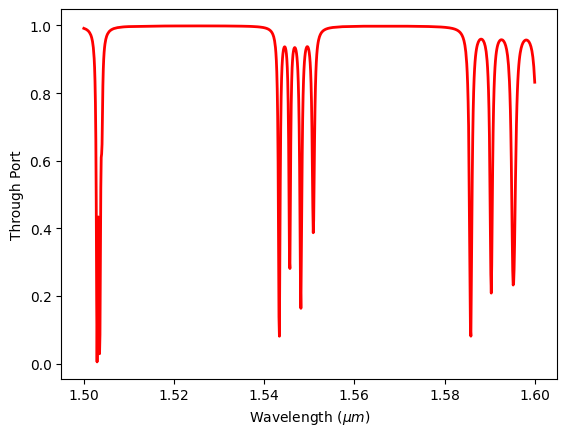

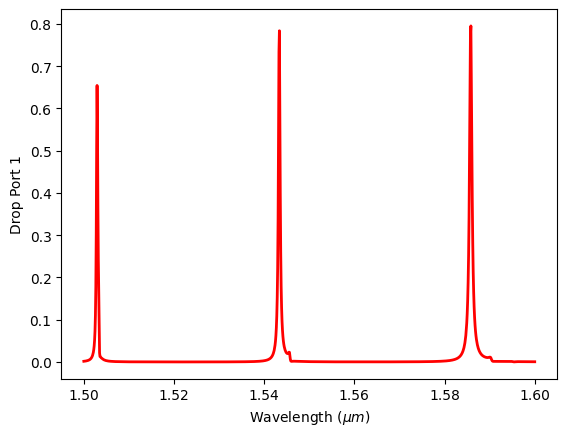

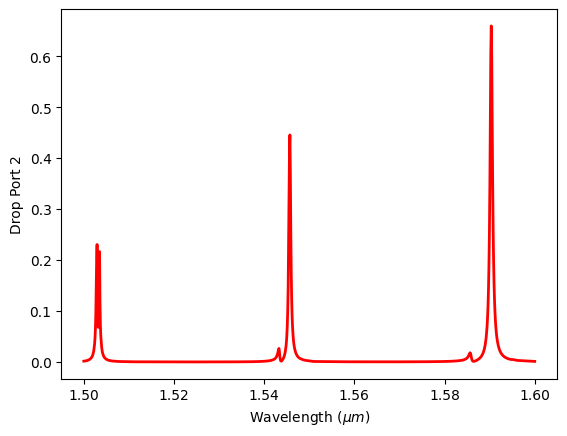

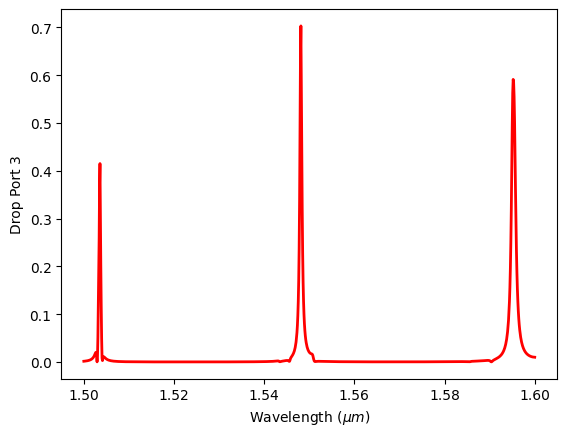

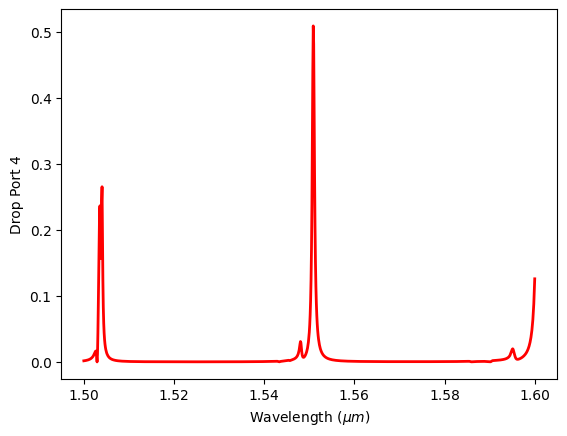

In [57]:
T1 = sim_data["Flux Monitor (Through Port)"].flux
T2 = sim_data["Flux Monitor (Drop Port 1)"].flux
T3 = sim_data["Flux Monitor (Drop Port 2)"].flux
T4 = sim_data["Flux Monitor (Drop Port 3)"].flux
T5 = sim_data["Flux Monitor (Drop Port 4)"].flux
measured_f = sim_data["Flux Monitor (Through Port)"].flux.f

plt.plot(td.C_0 / measured_f, T1, "red", linewidth=2)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Through Port")
plt.show()

plt.plot(td.C_0 / measured_f, T2, "red", linewidth=2)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Drop Port 1")
plt.show()

plt.plot(td.C_0 / measured_f, T3, "red", linewidth=2)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Drop Port 2")
plt.show()

plt.plot(td.C_0 / measured_f, T4, "red", linewidth=2)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Drop Port 3")
plt.show()

plt.plot(td.C_0 / measured_f, T5, "red", linewidth=2)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Drop Port 4")
plt.show()

